<a href="https://colab.research.google.com/github/premstaller1/uniproject-Data-Analytics/blob/main/Midterm_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pathlib import Path

marketing = pd.read_csv("bank_marketing.csv", sep=",", encoding='latin')
#marketing.head(10)
marketing

,age,education,default,balance,housing,contact,month,duration,campaign,TermDeposit
0,31,secondary,no,131,yes,cellular,may,294,1,no
1,35,tertiary,no,171,no,cellular,aug,204,2,no
2,28,secondary,no,3029,yes,cellular,may,58,6,no
3,29,secondary,no,1937,no,unknown,aug,6,1,no
4,54,secondary,no,1483,yes,cellular,may,53,2,no
...,...,...,...,...,...,...,...,...,...,...
11297,36,tertiary,no,307,yes,cellular,may,341,1,no
11298,50,tertiary,no,0,no,cellular,aug,128,2,no
11299,30,tertiary,no,3330,no,cellular,aug,109,6,no
11300,45,secondary,no,2353,yes,cellular,may,435,7,no


1 - age (numeric)

2 - education (categorical: "unknown","secondary","primary","tertiary")

3 - default: has credit in default? (binary: "yes","no")

4 - balance: average yearly balance, in euros (numeric)

5 - housing: has housing loan? (binary: "yes","no")

# related with the last contact of the current campaign:

6 - contact: contact communication type (categorical:
"unknown","telephone","cellular")

7 - month: last contact month of year (categorical: "jan", "feb",
"mar", ..., "nov", "dec")

8 - duration: last contact duration, in seconds (numeric)
# other attributes:

9 - campaign: number of contacts performed during this campaign and for
this client (numeric, includes last contact)

10 - TermDeposit: has the client subscribed a term deposit? (binary:
"yes","no")

# Gemeinsamer Bereich

In [ ]:
marketing.describe()

,age,balance,duration,campaign
count,11302.000000,11302.000000,11302.000000,11302.000000
mean,40.813750,1399.844364,258.175013,2.738276
std,10.529218,3131.946497,258.786621,3.085483
min,18.000000,-8019.000000,1.000000,1.000000
25%,33.000000,68.000000,102.000000,1.000000
50%,39.000000,458.000000,180.000000,2.000000
75%,48.000000,1411.000000,318.000000,3.000000
max,95.000000,66721.000000,3785.000000,55.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate numerical summaries

mean_age = marketing['age'].mean()
median_age = marketing['age'].median()
mode_age = marketing['age'].mode().iloc[0]

median_balance = marketing['balance'].median()
std_balance = marketing['balance'].std()

min_duration = marketing['duration'].min()
var_duration = marketing['duration'].var()

max_campaign = marketing['campaign'].max()
range_campaign = np.ptp(marketing['campaign'])

# Print the numerical summaries

print('Mean age:', mean_age)
print('Median age:', median_age)
print('Mode age:', mode_age)
print('Median balance:', median_balance)
print('Standard deviation of balance:', std_balance)
print('Minimum duration:', min_duration)
print('Variance of duration:', var_duration)
print('Maximum campaign:', max_campaign)
print('Range of campaign:', range_campaign)

Mean age: 40.813749778800215
Median age: 39.0
Mode age: 32
Median balance: 458.0
Standard deviation of balance: 3131.9464973048307
Minimum duration: 1
Variance of duration: 66970.51498307656
Maximum campaign: 55
Range of campaign: 54


Insights:
- The mean age of customers in the dataset is 40.81 years old.
- The median age of customers is slightly lower at 39 years old, which means that the distribution of age may be slightly skewed.
- The mode age is 32, which suggests that there may be a relatively large number of customers in their early thirties in the dataset.
- The median balance is 458, which means that half of the customers have a balance below this value and half have a balance above it.
- The standard deviation of balance is quite high at 3131.95, indicating that the balance varies widely across the customers in the dataset.
- The minimum duration of a call is just 1 second, suggesting that some calls may have been disconnected very quickly.
- The variance of duration is quite high at 66970.51, indicating that the duration of calls varies widely across the customers in the dataset.
- The maximum number of campaign contacts for a customer is 55, while the minimum is 1. The range of campaign contacts is 54, which suggests that there may be a wide variation in the number of contacts made with customers. 


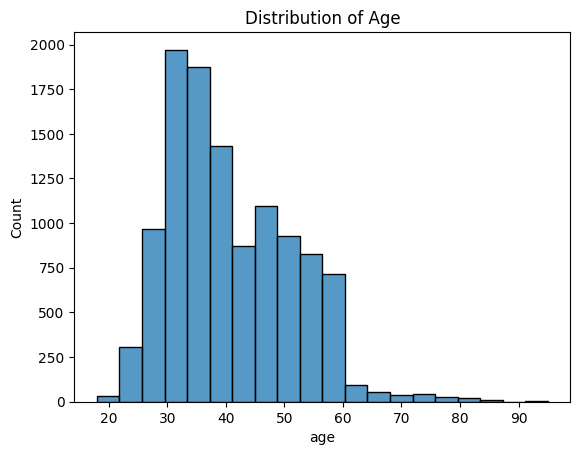

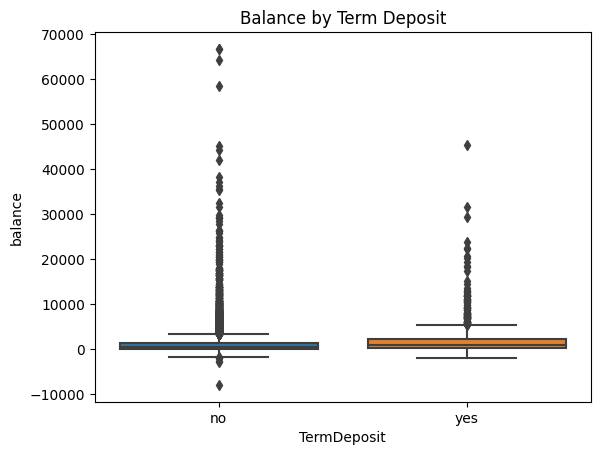

In [ ]:
sns.histplot(marketing['age'], bins=20, kde=False)
plt.title('Distribution of Age')
plt.show()

sns.boxplot(x='TermDeposit', y='balance', data=marketing)
plt.title('Balance by Term Deposit')
plt.show()

Insights:
1. Histogram of age: We can see the distribution of age across the customers in the dataset, which can help us to identify any patterns or trends. For example, we may notice that there are more customers in their thirties or forties, which could be a target demographic for marketing efforts.
2. Box plot of balance: We can see the median, quartiles, and outliers of the balance variable. For example, we notice that there are a few customers with very high balances, which could be a target group for marketing efforts.


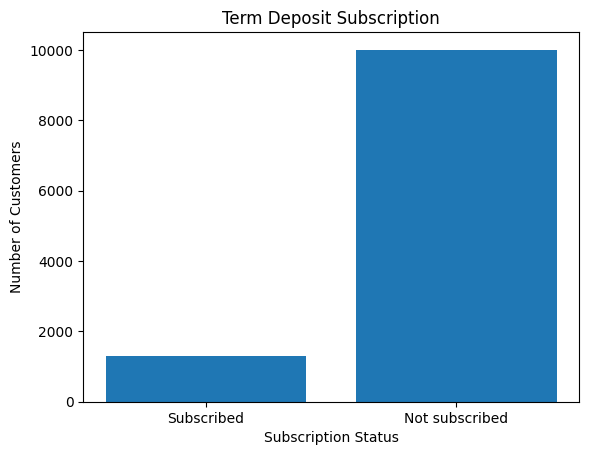

In [ ]:
import matplotlib.pyplot as plt

# Count the number of customers who subscribed and did not subscribe
subscribed = marketing[marketing['TermDeposit'] == 'yes']['TermDeposit'].count()
not_subscribed = marketing[marketing['TermDeposit'] == 'no']['TermDeposit'].count()
plt.bar(['Subscribed', 'Not subscribed'], [subscribed, not_subscribed])
plt.title('Term Deposit Subscription')
plt.xlabel('Subscription Status')
plt.ylabel('Number of Customers')

plt.show()

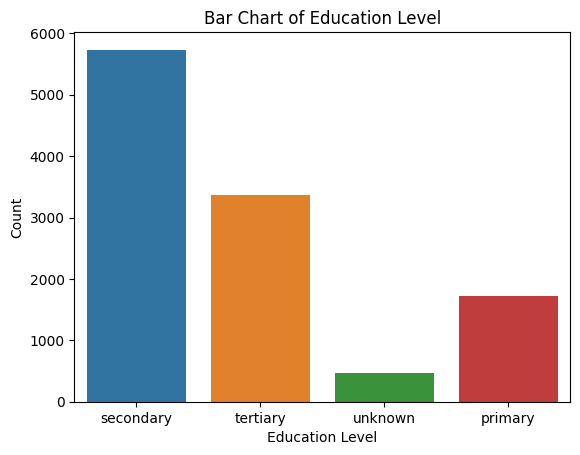

In [ ]:
sns.countplot(data=marketing, x='education')
plt.title('Bar Chart of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

<ipython-input-9-0d561ac46cd5>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=subscribers_edu, x='education', y='count', hue='TermDeposit', ci=None)


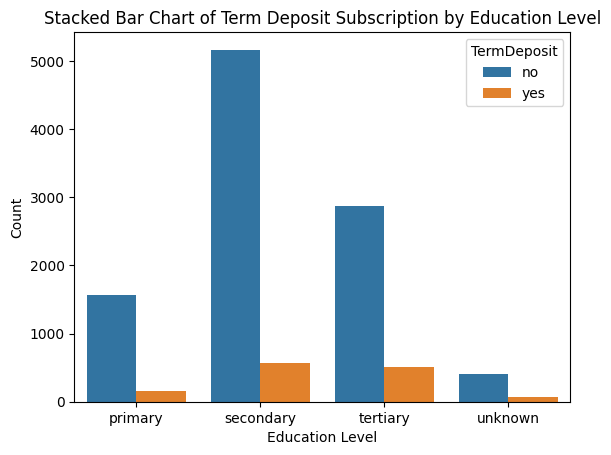

In [ ]:
subscribers_edu = marketing.groupby(['TermDeposit', 'education']).size().reset_index(name='count')
sns.barplot(data=subscribers_edu, x='education', y='count', hue='TermDeposit', ci=None)
plt.title('Stacked Bar Chart of Term Deposit Subscription by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()


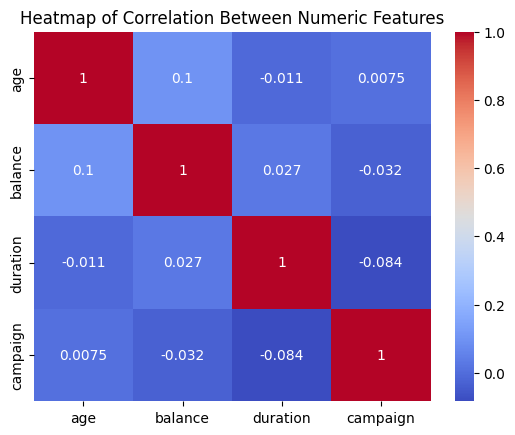

In [ ]:
sns.heatmap(marketing[['age', 'balance', 'duration', 'campaign']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Between Numeric Features')
plt.show()

Insights:

1. Bar chart of term deposit subscription: We can see the number or proportion of customers who subscribed to the term deposit, which can help us to evaluate the success of marketing efforts. For example, we notice that only a small percentage of customers actually subscribed, which could indicate that the marketing campaign needs to be adjusted.

2. Bar chart of education level: This visualization shows the frequency of each education level in the dataset. We can see that the majority of customers have a secondary or tertiary education level, while a smaller proportion have a primary education level.

3. Stacked bar chart of term deposit subscription by education level: This visualization shows the distribution of term deposit subscriptions across different education levels. We can see that a higher proportion of customers with a tertiary education level subscribed to a term deposit compared to those with a secondary or primary education level.

4. Heatmap of correlation between numeric features: This visualization shows the correlation coefficients between pairs of numeric features in the dataset. We can see, among other things, that there is a positive correlation between balance and age, and a negative correlation between duration and campaign. This suggests that customers with higher balances tend to be older, and that longer campaign durations are associated with a lower number of campaigns.

# Andres Bereich

In [ ]:
#Start the EDA Process
#We begin loading in the data + relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a Pandas DataFrame
df = pd.read_csv('bank_marketing.csv')

In [ ]:
# Get the first few rows of the DataFrame
df

print(df.head())

   age  education default  balance housing   contact month  duration  \
0   31  secondary      no      131     yes  cellular   may       294   
1   35   tertiary      no      171      no  cellular   aug       204   
2   28  secondary      no     3029     yes  cellular   may        58   
3   29  secondary      no     1937      no   unknown   aug         6   
4   54  secondary      no     1483     yes  cellular   may        53   

   campaign TermDeposit  
0         1          no  
1         2          no  
2         6          no  
3         1          no  
4         2          no  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11302 entries, 0 to 11301
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          11302 non-null  int64 
 1   education    11302 non-null  object
 2   default      11302 non-null  object
 3   balance      11302 non-null  int64 
 4   housing      11302 non-null  object
 5   contact      11302 non-null  object
 6   month        11302 non-null  object
 7   duration     11302 non-null  int64 
 8   campaign     11302 non-null  int64 
 9   TermDeposit  11302 non-null  object
dtypes: int64(4), object(6)
memory usage: 883.1+ KB


In [ ]:
# Get the shape of the DataFrame
print(df.shape)

#We have 11.302 counts and 10 variables

(11302, 10)


In [ ]:
# Get the data types of the columns
print(df.dtypes)

#We have a a even mix between categorical data and numerical data

age             int64
education      object
default        object
balance         int64
housing        object
contact        object
month          object
duration        int64
campaign        int64
TermDeposit    object
dtype: object


In [ ]:
# Get the summary statistics of the numeric columns
print(df.describe())

                age       balance      duration      campaign
count  11302.000000  11302.000000  11302.000000  11302.000000
mean      40.813750   1399.844364    258.175013      2.738276
std       10.529218   3131.946497    258.786621      3.085483
min       18.000000  -8019.000000      1.000000      1.000000
25%       33.000000     68.000000    102.000000      1.000000
50%       39.000000    458.000000    180.000000      2.000000
75%       48.000000   1411.000000    318.000000      3.000000
max       95.000000  66721.000000   3785.000000     55.000000


In [ ]:
# Check for missing values in the DataFrame
print(df.isnull().sum())

#The dataset seems to be rather clean already, reducing the amount of data preparation to do before we analyze everything

age            0
education      0
default        0
balance        0
housing        0
contact        0
month          0
duration       0
campaign       0
TermDeposit    0
dtype: int64


In [ ]:
df.value_counts()

age  education  default  balance  housing  contact    month  duration  campaign  TermDeposit
18   unknown    no       108      no       cellular   sep    169       1         yes            1
45   secondary  no       638      yes      cellular   aug    75        9         no             1
                         0        no       cellular   aug    145       10        no             1
                                                             215       2         no             1
                                           telephone  jul    533       3         yes            1
                                                                                               ..
34   tertiary   no       5945     yes      cellular   may    285       1         no             1
                         7263     yes      telephone  may    38        1         no             1
                         8000     no       cellular   feb    291       1         yes            1
                         

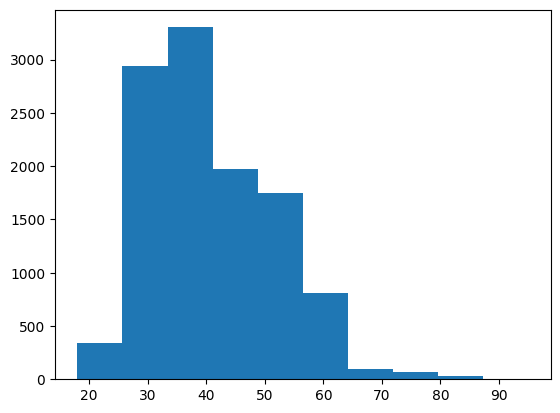

In [ ]:
# Plot a histogram of a numeric column
plt.hist(df['age'])
plt.show()

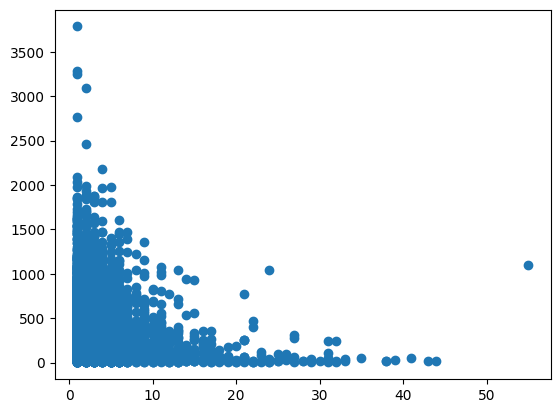

In [ ]:
# Plot a scatter plot of two numeric columns
plt.scatter(df['campaign'], df['duration'])
plt.show()

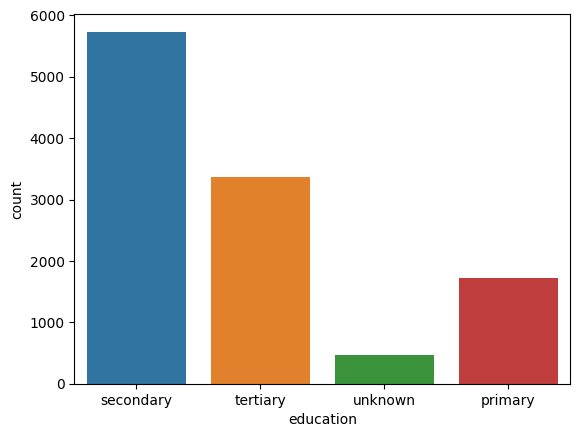

secondary    5734
tertiary     3375
primary      1724
unknown       469
Name: education, dtype: int64

In [ ]:
# Plot a bar plot of a categorical column
sns.countplot(x='education', data=df)
plt.show()

df['education'].value_counts()

#checking how many unknown values we have - in this case 469, which then are less useful for the analysis
#However, we can still check how the education influences balance and hous loans

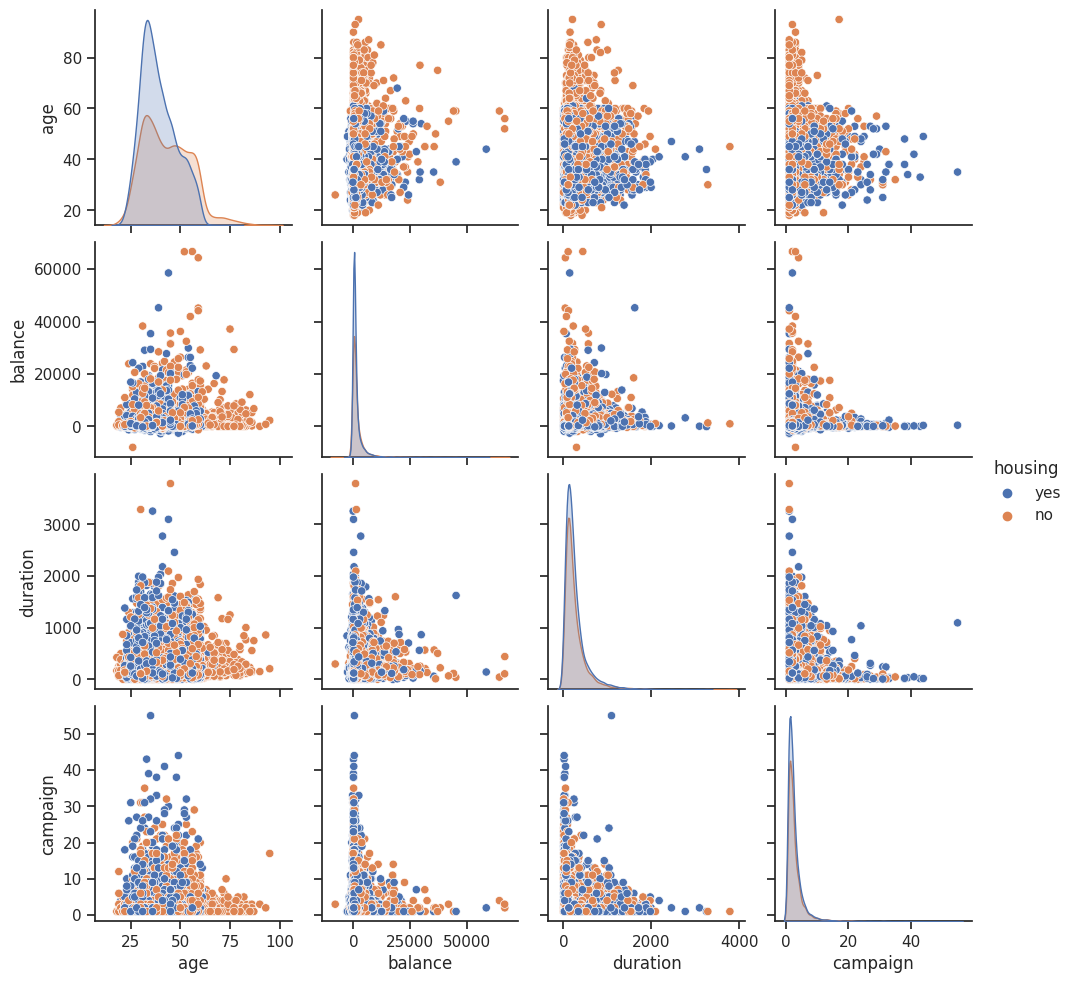

In [ ]:
#sns.scatterplot(data=df, x="balance", y="education")

sns.set_theme(style="ticks")
sns.pairplot(df, hue="housing")

<Axes: xlabel='education', ylabel='balance'>

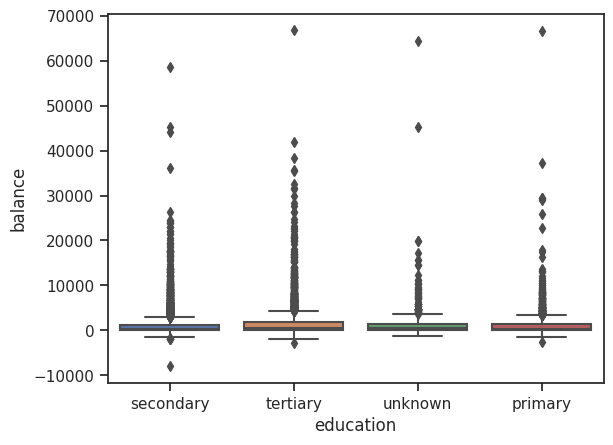

In [ ]:
sns.boxplot(df, x="education", y="balance")

#There are huge outliers in this plot, making it hard to analyse details - can we exclude them?

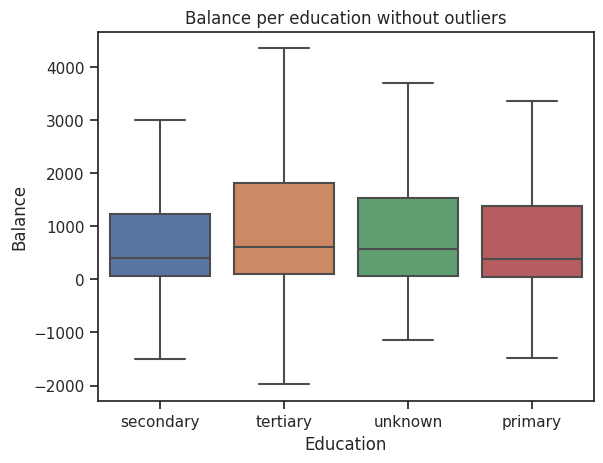

In [ ]:
# Create the boxplot
sns.boxplot(df, x="education", y="balance", showfliers=False)

# Set the plot title and axis labels
plt.title('Balance per education without outliers')
plt.xlabel('Education')
plt.ylabel('Balance')

# Show the plot
plt.show()

#Balance is between all of them rather close, tertiary tends to move more towards the extremes with higher balances - but also higher negatives

In [ ]:
#installing a library for EDA

!pip install ydata-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 64.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=381813592139c0f941976393d47ec535892618b4b2fbc9c8c221bdc3c302da75
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cec

In [ ]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

In [ ]:
#Loading profile report on our dataset to get an approximate EDA and more info about the dataset

profile = ProfileReport(df)
profile

#This report gives a good overview over all variables, creates a correlation matrix and does a good job at summarizing key aspects of the
#file that we are looking at.

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Regression Model excercise Andre Premstaller

Build a regression model for predicting the duration of the last customer contact, i.e., see if the
contact duration can be predicted as a function of customer features. This would allow the bank to
better schedule resources for calls that are estimated to be time-intensive.
Follow the regression evaluation approach that we discussed in class. Try different regression
models and select one based on your selected evaluation metric.
To evaluate the predictive model, focus on the following questions:
- Which regression model works best in your case?
- How good are the predictions?
- What are factors/features that significantly impact the predicted price, and do they make
sense?
- What other/next steps would you recommend for building a regression model to predict
the duration of a customer contact?

In [ ]:
#As seen above, the erxcercise is mostly concerned with 1 variables: contact duration
#Lets have some basic Analytics about it first, before we move closer to the regression problem.

In [ ]:
#Since the duration is most likely influenced by the contact medium, we can have a quick overview over the contact variable.

df['contact'].value_counts()

#This does not add much value, since almost 40% of the values are unknown - but judging from the other variables, it will always be some sort
#of voice medium.

cellular     7306
unknown      3268
telephone     728
Name: contact, dtype: int64

In [ ]:
#For simplicity and visualisation purposes we will also create a variable that turns the duration variable in one that counts time by minutes

df['duration_minutes'] = df['duration']/60
df['duration_minutes']


0        4.900000
1        3.400000
2        0.966667
3        0.100000
4        0.883333
           ...   
11297    5.683333
11298    2.133333
11299    1.816667
11300    7.250000
11301    2.066667
Name: duration_minutes, Length: 11302, dtype: float64

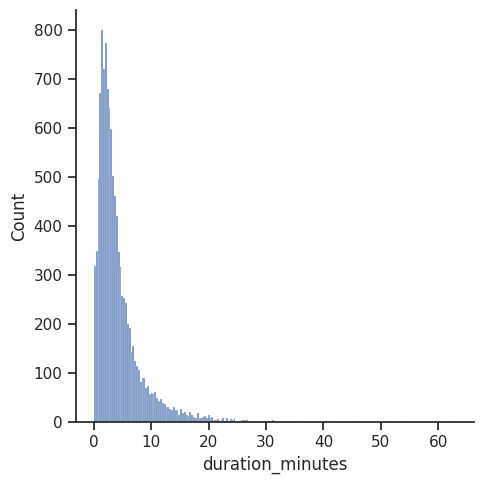

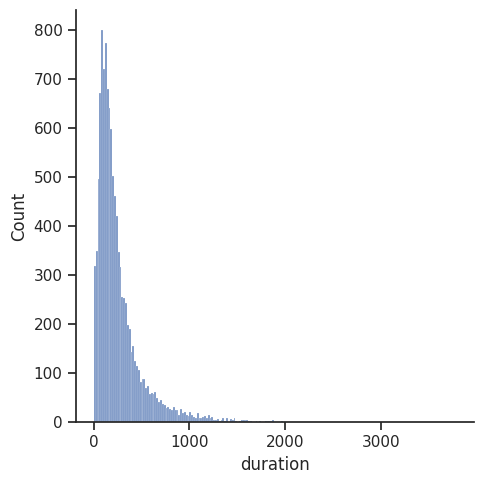

In [ ]:
#Most of the interaction seems to be between 0 and 10 Minutes or under 1'000 seconds

sns.displot(df, x="duration_minutes")
sns.displot(df, x="duration")


In [ ]:
df['duration_minutes'].describe()

count    11302.000000
mean         4.302917
std          4.313110
min          0.016667
25%          1.700000
50%          3.000000
75%          5.300000
max         63.083333
Name: duration_minutes, dtype: float64

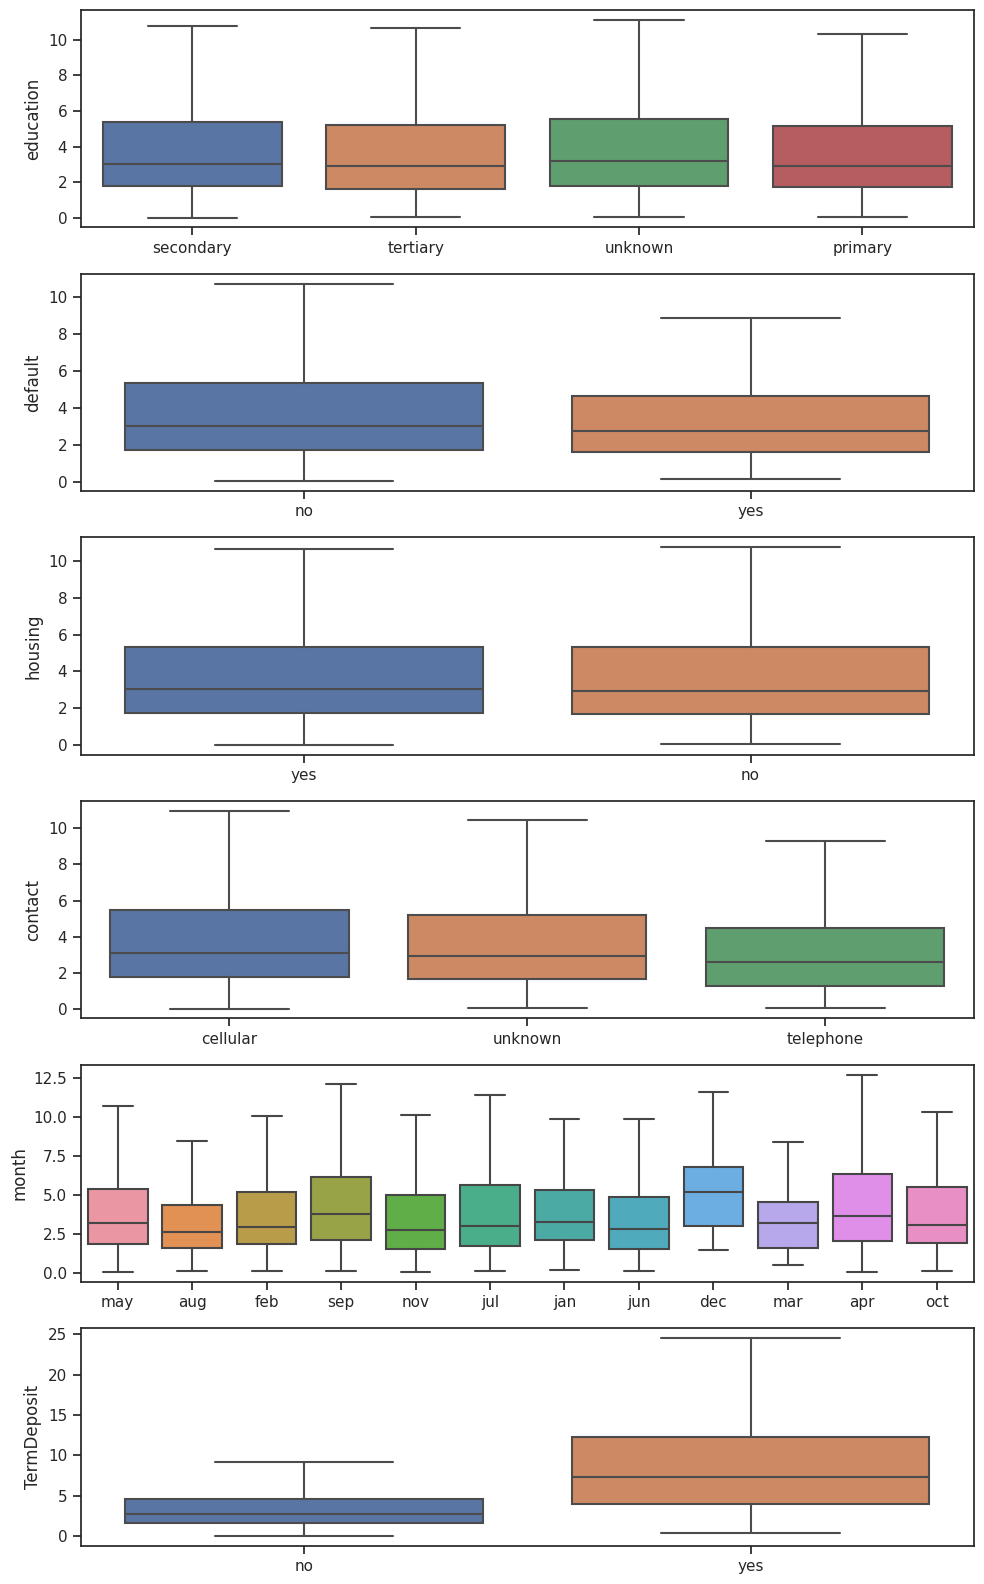

In [ ]:
#Lets see if there are some patterns between duration and other variables
# Get the list of categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Create a subplot for each categorical column
fig, axes = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(10, 16))

# Loop over the categorical columns and plot a box plot in each subplot
for i, col in enumerate(cat_cols):
    sns.boxplot(data=df, y='duration_minutes', x=col, showfliers=False, ax=axes[i])
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)
    

plt.tight_layout()
plt.show()

#There is not really anything specifically interesting to see, only that there are months, in which calls tend to take longer - e.g.
#in december. This could be because it is the end of the year and certain talks have to made.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


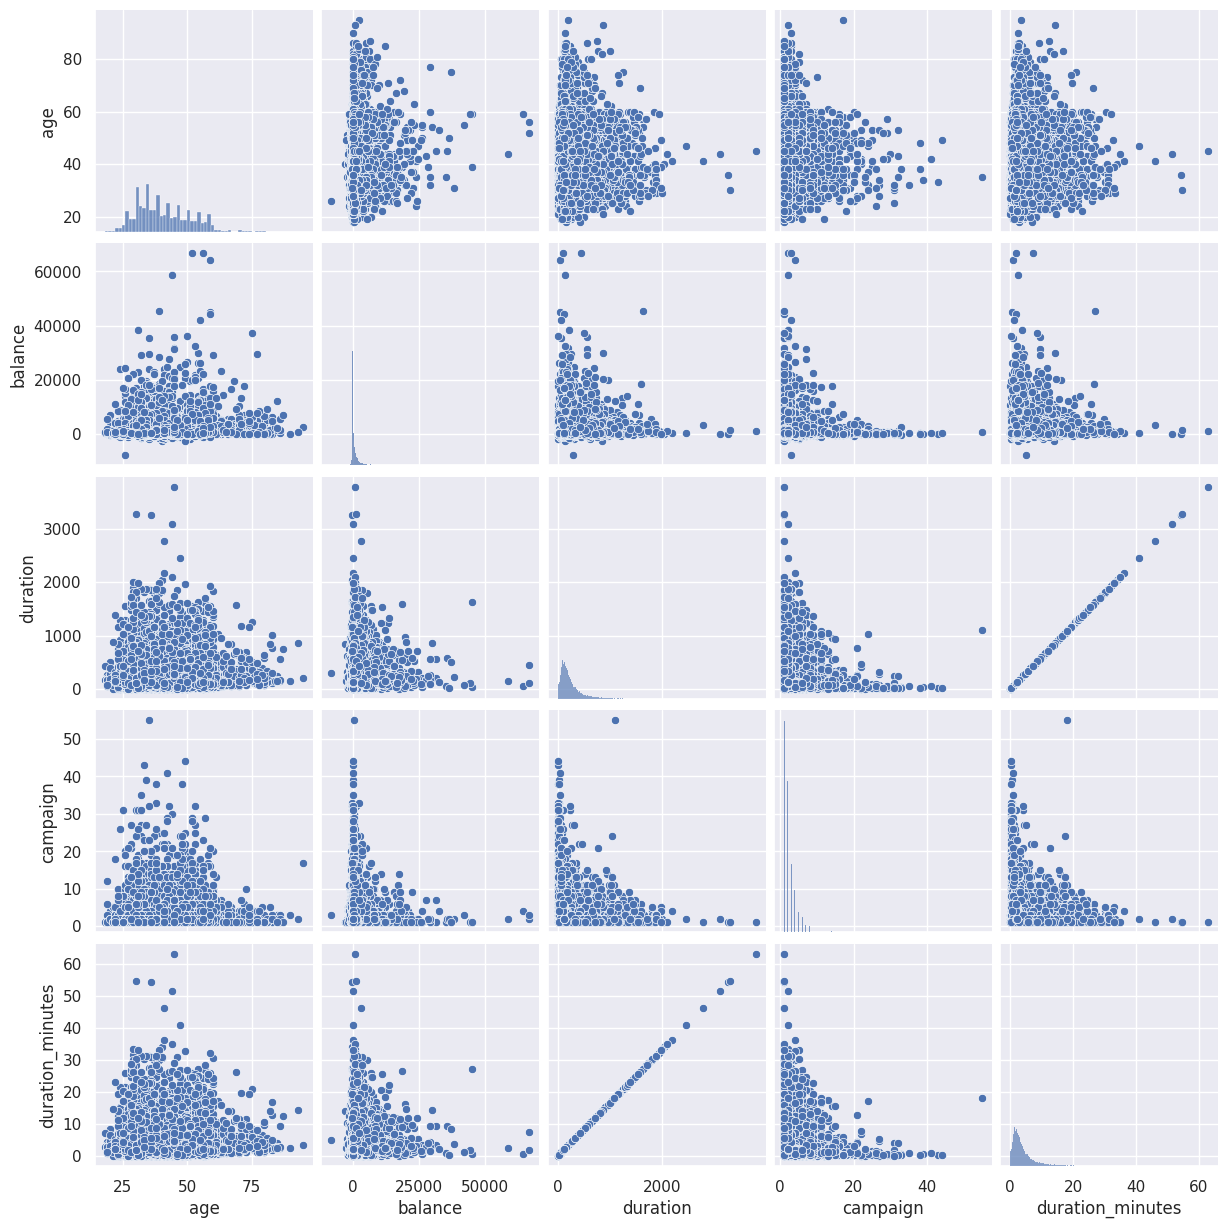

In [ ]:
#scatterplot
sns.set()
cols = df.columns
sns.pairplot(df[cols], size = 2.5)
plt.show();

<ipython-input-35-d765260e9ff5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df.corr()


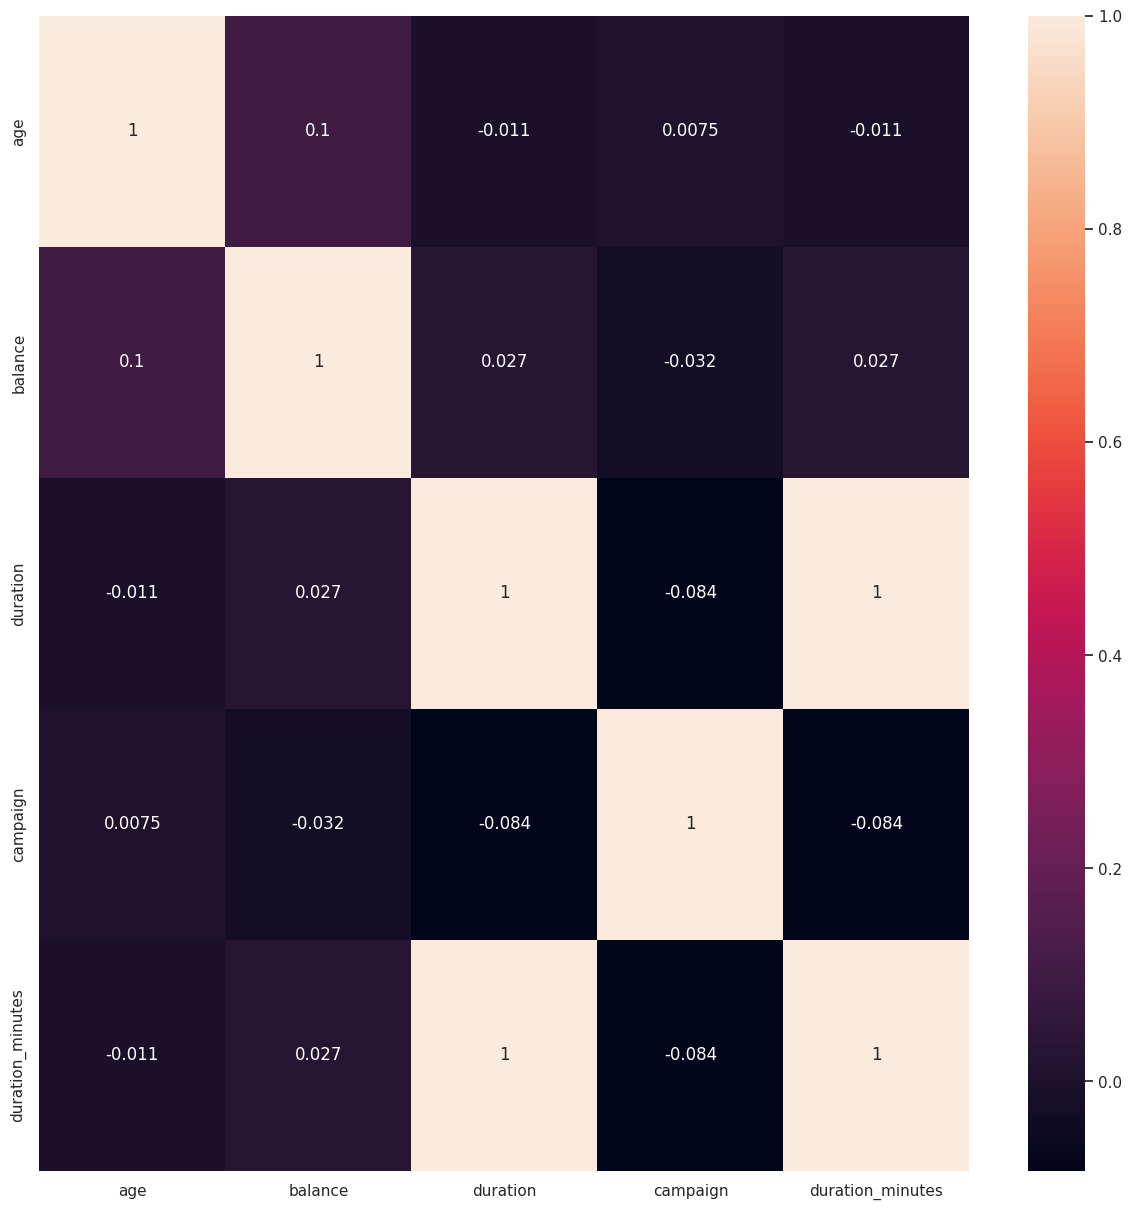

In [ ]:
#Now lets begin with regression 

corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(15,15)) # Sample figsize in inches
sns.heatmap(corrMatrix, annot=True, ax=ax)
plt.show()

## Model Evaluation - Performance Metrics

Depending on the type of supervised learning problem, i.e., if we have a regression or classification problem, there are a set of standard evaluation metrics that we commonly consider:
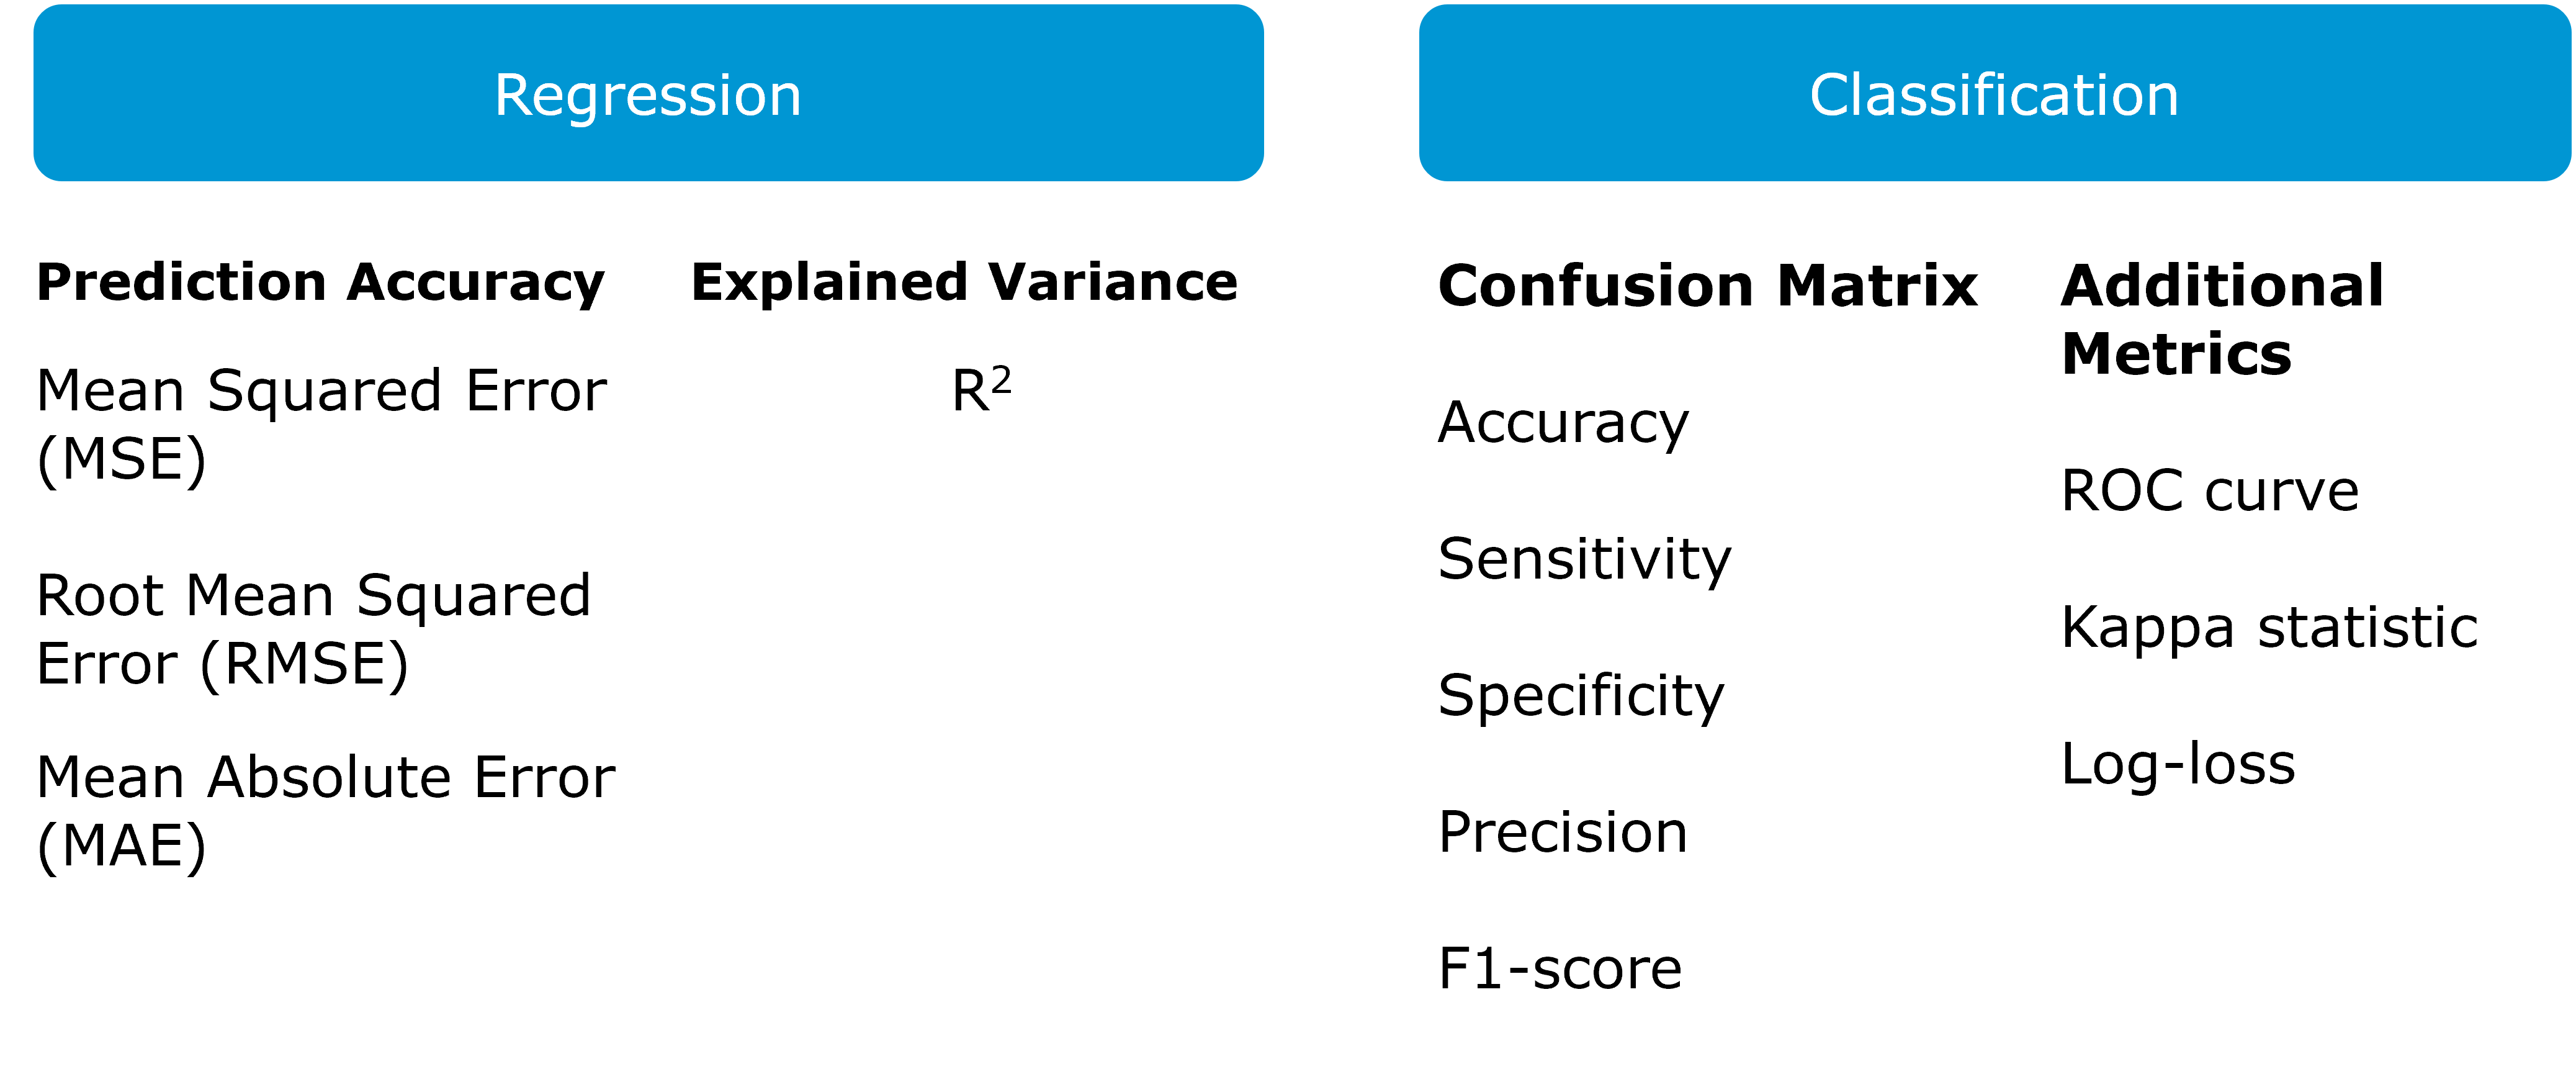

pearsonr is used to calculate the Pearson correlation coefficient between the duration_minutes variable and each numerical variable in the data DataFrame.

The Pearson correlation coefficient is a measure of the linear correlation between two variables, where values range from -1 to 1. A value of 1 indicates a perfect positive correlation, a value of -1 indicates a perfect negative correlation, and a value of 0 indicates no linear correlation. The p-value returned by pearsonr is used to test the null hypothesis that there is no linear correlation between the two variables. A p-value less than the chosen significance level (usually 0.05) indicates that the null hypothesis can be rejected and there is evidence of a linear correlation between the two variables.

## Linear Regression

In [ ]:
from scipy.stats.stats import pearsonr

#idle_men and no_of_style_change
for col in df.columns:
  if df[col].dtype == 'object':
    pass
  else:
    print(col)
    print(pearsonr(df["duration_minutes"], df[col]))
  

age
PearsonRResult(statistic=-0.010589760246207586, pvalue=0.260286760156356)
balance
PearsonRResult(statistic=0.027318061460269927, pvalue=0.003679253819878147)
duration
PearsonRResult(statistic=1.0, pvalue=0.0)
campaign
PearsonRResult(statistic=-0.08362946863911669, pvalue=5.322242012478635e-19)
duration_minutes
PearsonRResult(statistic=1.0, pvalue=0.0)


<ipython-input-36-158ecff0634f>:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


Age, Balance and Campaign all have a positive inpact on the duration - although the value for each of them is not that high. The p-value is only for balance and campaign significant, meaning that there is evidence for a linear correlation between each of the two variables and duration.

In [ ]:
#Conduct a linear regression with the duration as the dependent variable and the other variables as independent variables

# Import the required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#prepare a separate dataset, to not change the original one and include the dummy variables
df_reg_data = df
df_reg_data = df_reg_data.reset_index()
#df_reg_data.drop('duration', inplace=True)
df_reg_data = pd.get_dummies(df_reg_data)

#When you have categorical variables in a linear regression model, you need to convert them into numerical values so 
#that they can be used in the model. 
#One common approach to do this is to create dummy variables for each category.

In [ ]:
df_reg_data.drop('duration', axis=1, inplace=True)

#Drop duration, since I want to work with duration_minutes

In [ ]:
#check if the dataset is as intended with dummies and no duration variable

print(df_reg_data.columns)

Index(['index', 'age', 'balance', 'campaign', 'duration_minutes',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'TermDeposit_no',
       'TermDeposit_yes'],
      dtype='object')


In [ ]:
#split train and test sets as we did in our lecture 

training, test = train_test_split(df_reg_data, test_size=.4, random_state = 100) 

X_train = training.loc[:,training.columns != "duration_minutes"]
y_train = training[["duration_minutes"]].values.ravel()

X_test = test.loc[:,test.columns != "duration_minutes"]
y_test = test[["duration_minutes"]].values.ravel()

In [ ]:
# let's build our first regression model, here a linear regression.
# note that we estimate the model parameters on the training set and evaluate how well the predictions work on the test set.

# first, we estimate the model parameters on the training data (fitting the model)
linear_reg = LinearRegression().fit(X_train, y_train)

# then, we can let the model predict the outcome on the training and test sets
df_reg_data_pred_train = linear_reg.predict(X_train) # for the training data
df_reg_data_pred = linear_reg.predict(X_test) # for the test data

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

print("Mean Squared Error on the training set: ", mean_squared_error(y_train, df_reg_data_pred_train))
print("R2 Score on the training set: ", r2_score(y_train, df_reg_data_pred_train))

print("Mean Squared Error on the test set: ", mean_squared_error(y_test, df_reg_data_pred))
print("R2 Score on the test set: ", r2_score(y_test, df_reg_data_pred))

#with a random_state of 400 we get a r^2 score of 17.88 for the test set. I played around with the value for a while - 
#with 200 as the random_state we get 15.27, but for the training set 19.22
#with 100 we get 19.09 for the test and 16.9 for the training set
#with 50 we get almost an equal r^2 of 17.6 for both
#with 22 we get only 15.69 for the test set
#Thus, the best result was achieved with 100 as random_state with a .4 split size


Mean Squared Error on the training set:  15.753548322800759
R2 Score on the training set:  0.16920268156279827
Mean Squared Error on the test set:  14.611633791451666
R2 Score on the test set:  0.19094124728733675


## K-Fold

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

folds = KFold(n_splits = 7, shuffle = True, random_state = 400)
scores = cross_val_score(linear_reg, X_test, y_test, scoring='r2', cv=folds)
print(scores)
print(np.mean(scores))
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

#Here the r^2 score is 18.63 for the model, with a 400 random_state and 7 splits

[0.13971296 0.2555652  0.15748397 0.23345841 0.18504613 0.15332907
 0.1793852 ]
0.18628299128700765
0.19 accuracy with a standard deviation of 0.04


In [ ]:
#playing around with some code to automate the random_state optimum

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_validate, KFold


# Define the range of random states to try
random_states = range(100)

# Initialize lists to store the results
r2_scores = []
mae_scores = []
mse_scores = []

# Loop over the random states
for random_state in random_states:
    # Define the cross-validation method
    kf = KFold(n_splits=7, shuffle=True, random_state=random_state)
    
    # Define the model
    
    # Perform cross-validation and compute the scores
    cv_results = cross_validate(linear_reg, X_test, y_test, cv=kf, scoring=('r2', 'neg_mean_absolute_error', 'neg_mean_squared_error'))
    
    # Store the results
    r2_scores.append(cv_results['test_r2'].mean())
    mae_scores.append(-cv_results['test_neg_mean_absolute_error'].mean())
    mse_scores.append(-cv_results['test_neg_mean_squared_error'].mean())

# Find the random state with the best performance based on the R-squared score
best_random_state = random_states[np.argmax(r2_scores)]

# Print the results
print(f"Best random state: {best_random_state}")
print(f"R-squared score: {max(r2_scores):.2f}")
print(f"MAE score: {mae_scores[np.argmax(r2_scores)]:.2f}")
print(f"MSE score: {mse_scores[np.argmax(r2_scores)]:.2f}")

#Seems like this really optimized our model, with 0.19 being really high for kfolds until now

Best random state: 92
R-squared score: 0.19
MAE score: 2.57
MSE score: 14.69


## K-Nearest Neighbor Model

In [145]:
#Re-create the training and test sets, so that we can start unbiased

df_reg_data = df
df_reg_data = df_reg_data.reset_index()
#df_reg_data.drop('duration', inplace=True)
df_reg_data = pd.get_dummies(df_reg_data)

In [146]:
df_reg_data.drop('duration', axis=1, inplace=True)

In [147]:
training, test = train_test_split(df_reg_data, test_size=.2, random_state = 22) 

X_train = training.loc[:,training.columns != "duration_minutes"]
y_train = training[["duration_minutes"]].values.ravel()

X_test = test.loc[:,test.columns != "duration_minutes"]
y_test = test[["duration_minutes"]].values.ravel()

In [148]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)

knn_reg = knn.fit(X_train, y_train)

knn_reg_pred_train = knn_reg.predict(X_train)
knn_reg_pred = knn_reg.predict(X_test)

In [149]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

print("kNN Mean Squared Error on the training set: ", mean_squared_error(y_train, knn_reg_pred_train))
print("kNN R2 Score on the training set: ", r2_score(y_train, knn_reg_pred_train))

print("kNN Mean Squared Error on the test set: ", mean_squared_error(y_test, knn_reg_pred))
print("kNN R2 Score on the test set: ", r2_score(y_test, knn_reg_pred))

#My r2 score for the test set is negative in this case, meaning that it fits the data really poorly.
#The training score is not that bad, with 21.41 it is better than the other models - but the test set needs to be improved somehow.

kNN Mean Squared Error on the training set:  15.135145551745751
kNN R2 Score on the training set:  0.21042062940290185
kNN Mean Squared Error on the test set:  20.1741065457762
kNN R2 Score on the test set:  -0.2360104857402472


In [ ]:
#Since in Knn I keep getting a negative r2 score for the test, I try to normalize my dataset due to the sensitivity of knn towards scale
from sklearn.preprocessing import MinMaxScaler

# create a MinMaxScaler object
scaler = MinMaxScaler()

# fit the scaler to the data and transform the data
X_train_scaled = scaler.fit_transform(X_train)

# transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# create a kNN object with the desired number of neighbors
k = 5
knn = KNeighborsRegressor(n_neighbors=k)

# fit the kNN model to the normalized training data
knn.fit(X_train_scaled, y_train)

# make predictions on the normalized test data
y_pred = knn.predict(X_test_scaled)

print("kNN Mean Squared Error on the test set: ", mean_squared_error(y_test, y_pred))
print("kNN R2 Score on the test set: ", r2_score(y_test, y_pred))

kNN Mean Squared Error on the test set:  15.636541481153865
kNN R2 Score on the test set:  0.041993300294880354


## LASSO: A (linear) model with integrated feature selection

## Other Models: 

# Davids Bereich

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np



# Convert to numpy array
yes_no_array = np.array(marketing["TermDeposit"])

# Use numpy where() function to convert yes and no values to 1 and 0 respectively
marketing["TermDeposit"] = np.where(yes_no_array == 'yes', 1, 0)

marketing_clas = marketing.loc[:,["age", "balance", "TermDeposit"]]
marketing_clas.dropna(inplace=True)
marketing_clas = pd.get_dummies(marketing_clas)


# Split your data into training and testing sets
train, test = train_test_split(marketing_clas, test_size=0.2, random_state=39)

X_train = train.loc[:,train.columns != "TermDeposit"]
y_train = train[["TermDeposit"]].values.ravel()


X_test = test.loc[:,test.columns != "TermDeposit"]
y_test = test[["TermDeposit"]].values.ravel()

X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9041 entries, 5120 to 8297
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   age      9041 non-null   int64
 1   balance  9041 non-null   int64
dtypes: int64(2)
memory usage: 211.9 KB


In [ ]:
###Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs', max_iter=10000, penalty='none').fit(X_train, y_train)

logistic_reg_pred_train = logreg.predict(X_train)
logistic_reg_pred = logreg.predict(X_test)

logistic_reg_pred_train_proba = logreg.predict_proba(X_train)[:,1]
logistic_reg_pred_proba = logreg.predict_proba(X_test)[:,1]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [ ]:
###Decision Tree

In [ ]:
###KNN-Classifier

In [ ]:
###Naive-Bayes analyser

# Patricks Bereich

In [ ]:
from scipy.spatial import distance
distance.euclidean(marketing['age'], marketing['balance'])


362839.3483595736

Before we start with the code I want to add that I spent hours researching for methods or ways to identify the two (or three) variables that are the most approproriate/best ones for using in a clustering algorithm here. However, due to the fact that we also used only two variables and that we sticked to two numerical ones instead of a mix of numerical and categorical variables, I decided to also go for two numerical ones. I had problems finding good approaches for variable selection as this was skipped nearly completely in the lecture casts and notebooks. Moreover, the approaches I found on the internet (e.g. looking for Euclidean distance between nu

In [ ]:
#1 Preparation: Transform the variables into having a mean of 0 and a standard deviation of 1 using StandardScaler
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
marketing["age scaled"] = standard_scaler.fit_transform(marketing[["age"]]) 
marketing["balance scaled"] = standard_scaler.fit_transform(marketing[["balance"]]) 


marketing[["age", "age scaled", "balance", "balance scaled"]].describe()

,age,age scaled,balance,balance scaled
count,11302.000000,1.130200e+04,11302.000000,1.130200e+04
mean,40.813750,-2.558759e-16,1399.844364,2.200407e-17
std,10.529218,1.000044e+00,3131.946497,1.000044e+00
min,18.000000,-2.166805e+00,-8019.000000,-3.007478e+00
25%,33.000000,-7.421345e-01,68.000000,-4.252637e-01
50%,39.000000,-1.722664e-01,458.000000,-3.007350e-01
75%,48.000000,6.825358e-01,1411.000000,3.562044e-03
max,95.000000,5.146503e+00,66721.000000,2.085733e+01


In [ ]:
#2 Dropping NA values for both columns

marketing_no_na = marketing.dropna(subset =["age scaled", "balance scaled"]).reset_index()

X = marketing_no_na[["age scaled", "balance scaled"]].values

In [ ]:
#3 Calculating DB-score values to decide on the number of clusters

db_scores = []
K = range(2,10)

for k in K:
    print("current number of clusters: ", k)
    kmeans_preds = KMeans(n_clusters=k).fit_predict(X)
    print("calculating Davies-Bouldin score")
    db_scores.append(davies_bouldin_score(X, kmeans_preds))
    
db_scores

current number of clusters:  2


NameError: ignored

In [ ]:
#4 Drawing the DB-score graph

db_scores_frame = pd.DataFrame({"K":K, "Davies-Bouldin Score": db_scores})
sns.lineplot(data=db_scores_frame, x="K", y="Davies-Bouldin Score")

#--> 3 seems to be the perfect number of clusters

In [ ]:
#5 Using WSS as another method for determining the best number of clusters

from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

sum_of_squares_scaled = []

K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k).fit(X_scaled)
    sum_of_squares_scaled.append(kmeans.inertia_)


In [ ]:
sum_of_squares_scaled_frame = pd.DataFrame({"K":K, "sum_of_squares": sum_of_squares_scaled})
sns.lineplot(data=sum_of_squares_scaled_frame, x="K", y="sum_of_squares")

#--> Also 3 seems to be the right number

In [ ]:
#6.1 Drawing the 3 Clusters (scaled)
from sklearn.cluster import KMeans
from seaborn import scatterplot

kmeans = KMeans(n_clusters=3, random_state=1).fit(X)

plot_data = marketing[["age scaled", "balance scaled"]].dropna()
plot_data["Cluster"] = kmeans.labels_
plot_data

sns.scatterplot(data=plot_data, x="age scaled", y="balance scaled", hue="Cluster")

In [ ]:
#6.2 Drawing the 3 Clusters (not scaled)
from sklearn.cluster import KMeans
from seaborn import scatterplot

kmeans = KMeans(n_clusters=3, random_state=1).fit(X)

plot_data = marketing[["age", "balance"]].dropna()
plot_data["Cluster"] = kmeans.labels_
plot_data

sns.scatterplot(data=plot_data, x="age", y="balance", hue="Cluster")

In [ ]:
#7 Calculate Oberservations per Cluster and cluster centers
from collections import Counter

Counter(kmeans.labels_)
#kmeans.cluster_centers_


In the following I will explore the cluster properties by using three techniques: 

1.   Calculating the mean, median and mode per cluster
2.   Different visualization techniques to explore the differences between customer segments. For example, box plots  to compare the distribution of different features across clusters
3. Statistical tests to determine if there are significant differences between customer segments. For example, ANOVA to test if there are significant differences in the means of different features across clusters or chi-squared tests to test if there are significant differences in the proportions of categorical variables across clusters.


In [ ]:
#8.1: Explore cluster properties: Calculating mean, median, and mode per cluster for each variable
cluster_summary = pd.DataFrame({'mean_age': marketing.groupby('Cluster')['age'].mean(),
                                'median_age': marketing.groupby('Cluster')['age'].median(),
                                'mode_age': marketing.groupby('Cluster')['age'].apply(lambda x: stats.mode(x)[0][0]),
                                'mean_balance': marketing.groupby('Cluster')['balance'].mean(),
                                'median_balance': marketing.groupby('Cluster')['balance'].median(),
                                'mode_balance': marketing.groupby('Cluster')['balance'].apply(lambda x: stats.mode(x)[0][0])})

print(cluster_summary)

**Interpretation: Based on the summary statistics for the three clusters:**

- Cluster 0: Customers in this cluster have a higher average age (52.3 years) and a lower balance (mean of 1168.5). The median age and balance are also relatively low. The mode age is 46, which is the most frequent age in this cluster. The mode balance is 0, which suggests that many customers in this cluster have a zero balance.
- Cluster 1: Customers in this cluster have a lower average age (34.1 years) and a lower balance (mean of 864.8). The median age and balance are also relatively low. The mode age is 32, which is the most frequent age in this cluster. The mode balance is 0, which suggests that many customers in this cluster have a zero balance.
- Cluster 2: Customers in this cluster have a higher average age (43.4 years) and a much higher balance (mean of 14,033.3). The median balance is also very high at 11,008. The mode age is 32, which is much lower than the average and median ages in this cluster. The mode balance is 11,862, which is also lower than the mean and median balances in this cluster.

These results suggest that the three clusters represent distinct groups of customers with different ages and account balances. Cluster 0 and 1 are characterized by lower balances, with cluster 0 being composed of customers who are generally older and cluster 1 being composed of younger customers. Cluster 2, on the other hand, has much higher account balances and is composed of customers who are generally older, but have a mode age that is lower than the average and median ages.

In [ ]:
#8.2 Exploring cluster properties: education per cluster

marketing["Cluster"] = kmeans.labels_
sns.countplot(y="education", hue="Cluster", data=marketing)

**Interpretation:** The barplot above shows that the fraction/number of bank customers with different educational backgrounds could vary significantly for each cluster on the first sight at least. This is further checked down below by using a Chi-Squared test, which in fact proves that belonging to one cluster has indeed an impact on the education. For example we have a big fraction of customers that belong to cluster 0 and have just a primary education as well as a low number of customer of cluster 0 with a tertiary education. This could of course be due to the age of the customers, which starts at 18 in the dataset.

In [ ]:
#8.2 Exploring cluster properties: TermDeposit per cluster

marketing["Cluster"] = kmeans.labels_
sns.countplot(y="TermDeposit", hue="Cluster", data=marketing)

**Interpretation:** The barplot above shows that the the fraction/number of bank customers that have subscribed to a term deposit does not vary significantly for each cluster, considering the fact that cluster 1 contains the most observations. Therefore, we can assume that belonging to one cluster does not influence whether a customer has a term deposit or not. This assumption can be considered true by looking at the Chi-Squared test for TermDeposit down below.

In [ ]:
#8.2 Exploring cluster properties: default per cluster

marketing["Cluster"] = kmeans.labels_
sns.countplot(y="default", hue="Cluster", data=marketing)

**Interpretation:** The barplot above shows that the the fraction/number of bank customers that have a credit in default could vary significantly for each cluster on the first sight at least. This is further checked down below by using a Chi-Squared test, which in fact proves that belonging to one cluster has indeed an impact on whether a customer has a credit in default

In [ ]:
#8.2 Exploring cluster properties: default per cluster

marketing["Cluster"] = kmeans.labels_
sns.countplot(y="housing", hue="Cluster", data=marketing)

**Interpretation:** The barplot above shows that the the fraction/number of bank customers that have a housing loan varies significantly for each cluster . This is further checked down below by using a Chi-Squared test, which in fact proves that belonging to one cluster has indeed an impact on whether a customer has a housing loan. In the graph above you can see that especially customers of cluster 1, which are typically younger ones above 40 years tend to have a housing loan, which is no surprise as these customers are also rather in the focus group of building new houses for family e.g.

In [ ]:
#8.3 Exploring cluster properties: ANOVA-test for balance
from scipy.stats import f_oneway

# extract balance values and cluster labels from marketing dataframe
balance_data = marketing['balance'].values
cluster_labels = kmeans.labels_

# create a list to store the balance values for each cluster
cluster_balance = []
for i in range(kmeans.n_clusters):
    cluster_balance.append(balance_data[cluster_labels == i])

# conduct one-way ANOVA test to compare the means of balance across clusters
f_statistic, p_value = f_oneway(*cluster_balance)

if p_value < 0.05:
    print("There is a significant difference in balance among the clusters (p-value = {:.3f})".format(p_value))
else:
    print("There is no significant difference in balance among the clusters (p-value = {:.3f})".format(p_value))


**Interpretation:**
The result of the ANOVA test indicates whether there is a significant difference in the means of a numerical variable (in this case, the "balance" feature) across different clusters. A p-value less than the significance level (usually 0.05) suggests that there is a statistically significant difference in balance among the clusters. The p-value of 0.000 in this case indicates that the difference in balance across the clusters is very unlikely to have occurred by chance, and therefore, there is a significant difference in balance among the clusters.

In [ ]:
#8.3 Exploring cluster properties: ANOVA-test for duration
from scipy.stats import f_oneway

# extract duration values and cluster labels from marketing dataframe
duration_data = marketing['duration'].values
cluster_labels = kmeans.labels_

# create a list to store the duration values for each cluster
cluster_duration = []
for i in range(kmeans.n_clusters):
    cluster_duration.append(duration_data[cluster_labels == i])

# conduct one-way ANOVA test to compare the means of duration across clusters
f_statistic, p_value = f_oneway(*cluster_duration)

if p_value < 0.05:
    print("There is a significant difference in balance among the clusters (p-value = {:.3f})".format(p_value))
else:
    print("There is no significant difference in balance among the clusters (p-value = {:.3f})".format(p_value))


**Interpretation:**
The result of the test indicates that the p-value is 0.085, which is greater than the significance level of 0.05. Therefore, we fail to reject the null hypothesis and conclude that there is no significant difference in "duration" means among the clusters.

In other words, the analysis suggests that the average "duration" value does not vary significantly across different clusters.

In [ ]:
#8.3 Exploring cluster properties: Chi-Squared Test for education
from scipy.stats import chi2_contingency

# create a contingency table of the cluster counts for a categorical variable
cont_table = pd.crosstab(plot_data["Cluster"], marketing["education"])

# perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(cont_table)

print("Chi-squared test results for education status and cluster membership:")
print("Chi-squared statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)


**Interpretation:**
The chi-squared test results show that there is a significant relationship between education status and cluster membership.

The chi-squared statistic value of 394.605 and the p-value of 4.037359629145245e-82 indicate that the differences between the observed and expected frequencies are too large to be explained by chance. In other words, there is evidence that the distribution of education status is not the same across all three clusters.

In [ ]:
#8.3 Exploring cluster properties: Chi-Squared Test for TermDeposit
from scipy.stats import chi2_contingency

# create a contingency table of the cluster counts for a categorical variable
cont_table = pd.crosstab(plot_data["Cluster"], marketing["TermDeposit"])

# perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(cont_table)

print("Chi-squared test results for education status and cluster membership:")
print("Chi-squared statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

**Interpretation:** The results of the test show that the chi-squared statistic is 3.58 and the p-value is 0.17. The degrees of freedom are 2, and the expected frequencies table shows the expected counts under the null hypothesis.

Since the p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis, and we conclude that there is no significant association between TermDeposit variable and cluster membership. This suggests that cluster membership is not a significant factor in determining whether a customer will subscribe to a term deposit.

In [ ]:
#8.3 Exploring cluster properties: Chi-Squared Test for default
from scipy.stats import chi2_contingency

# create a contingency table of the cluster counts for a categorical variable
cont_table = pd.crosstab(plot_data["Cluster"], marketing["default"])

# perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(cont_table)

print("Chi-squared test results for education status and cluster membership:")
print("Chi-squared statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)


**Interpretation:** These results suggest that there may be a significant association between the "default" variable and the cluster membership. The chi-squared statistic is 9.0166, which indicates that there is a deviation from the expected frequencies that is not likely due to chance. The p-value is 0.011, which is less than the conventional alpha level of 0.05, suggesting that we can reject the null hypothesis of no association between "default" and cluster membership. The degrees of freedom are 2, indicating that there are two levels of the "default" variable that are being compared across the three clusters. 

In [ ]:
#8.3 Exploring cluster properties: Chi-Squared Test for housing
from scipy.stats import chi2_contingency

# create a contingency table of the cluster counts for a categorical variable
cont_table = pd.crosstab(plot_data["Cluster"], marketing["housing"])

# perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(cont_table)

print("Chi-squared test results for education status and cluster membership:")
print("Chi-squared statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

**Interpretation:** The chi-squared test result shows that there is a significant association between the housing variable and the clusters. The chi-squared statistic value of 335.0046 is very large, indicating a strong association. The p-value is very small (1.797483743651756e-73), indicating that it is extremely unlikely that the observed association is due to chance. The degrees of freedom is 2, which corresponds to the number of categories in the housing variable minus 1. Overall, the test proves the assumption mentioned before that the clusters have influence on housing loans.